Yannick mbia mah

In [1]:

! pip install sklearn
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib 

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=115dd944b981b7a10aaea51f1eed02e414645f8c12a1f7245d93684cbc62d893
  Stored in directory: c:\users\janni\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc


In [4]:
#Import the data
df = pd.read_csv('Car Insurance Data.csv')
df.head(2)

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   

  Number of Open Complaints Number of Policies     Policy Type        Policy  \
0                         0                  1  Corporate Auto  Corporate L3   
1                         0                  8   Personal Auto   Personal L3   

   Renew Offer Type  Sales Channel  Total Claim Amount  Vehicle Class  \
0            Offer1          Agent          384.811147   Two-Door Car   
1            Offer3          Agent         1131.464935  Four-Door Car   

  Vehicle Size Renewal  
0      Medsize       1  
1      Medsize       1  

[2 rows x 25 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
df.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  \
count                9134.000000         9134.000000         9134.000000   
mean                    0.384388            2.966170          434.088794   
std                     0.910384            2.390182          290.500092   
min                     0.000000            1.000000            0.099007   
25%                     0.000000            1.000000          272.258244   
50%                     0.000000            2.000000          383.945434   
75%                     0.000000            4.000000          547.514839   
max                     5.000000            9.000000         2893.239678   

           Renewal  
count  9134.000000  
mean      0.601817  
std       0.489550  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

# Data Visualization 

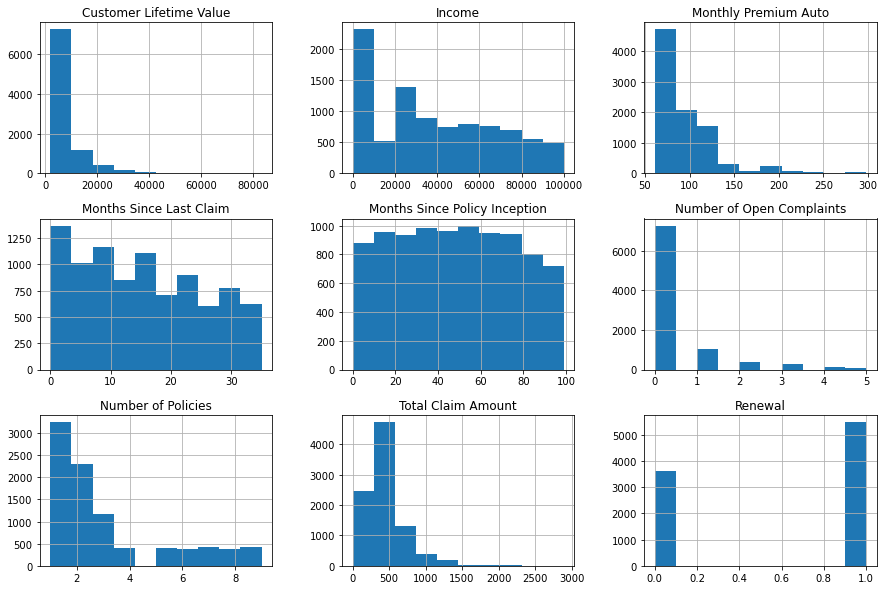

In [7]:
df.hist(figsize=(15,10))
plt.show()

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Density'>

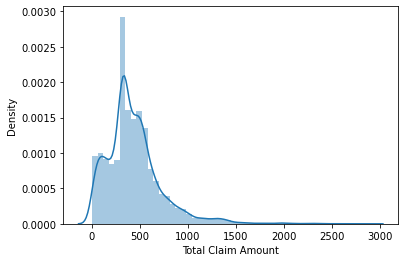

In [8]:
sns.distplot(df['Total Claim Amount'])

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Density'>

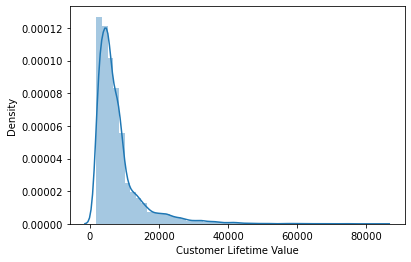

In [9]:
sns.distplot(df['Customer Lifetime Value'])

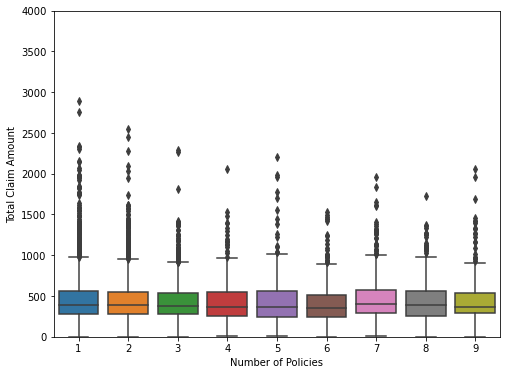

In [10]:
var = 'Number of Policies'
data = pd.concat([df['Total Claim Amount'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Total Claim Amount", data=data)
fig.axis(ymin=0, ymax=4000);

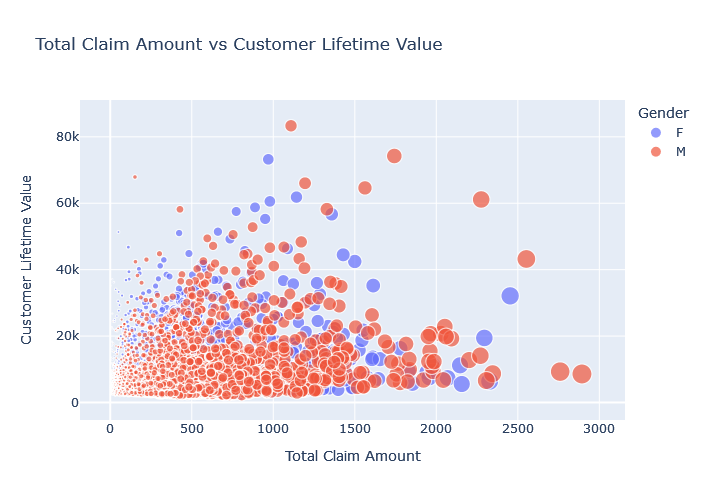

In [11]:
px.scatter(df, y="Customer Lifetime Value", x="Total Claim Amount",color="Gender",height=500,size='Total Claim Amount',
          title="Total Claim Amount vs Customer Lifetime Value")

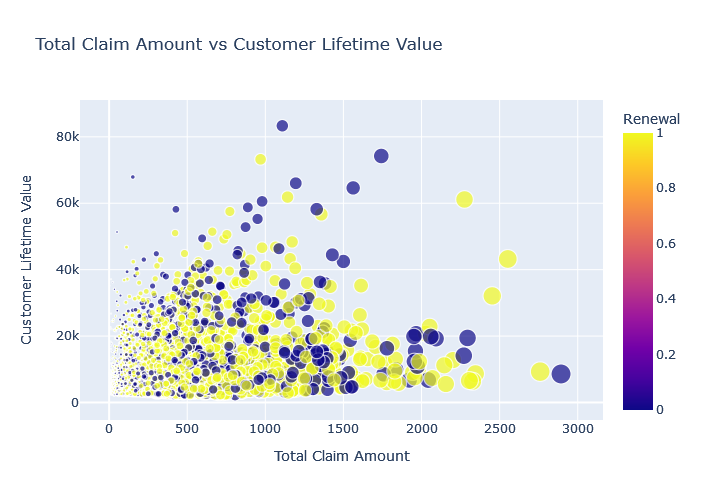

In [12]:
px.scatter(df, y="Customer Lifetime Value", x="Total Claim Amount",color="Renewal",height=500,size='Total Claim Amount',
          title="Total Claim Amount vs Customer Lifetime Value")

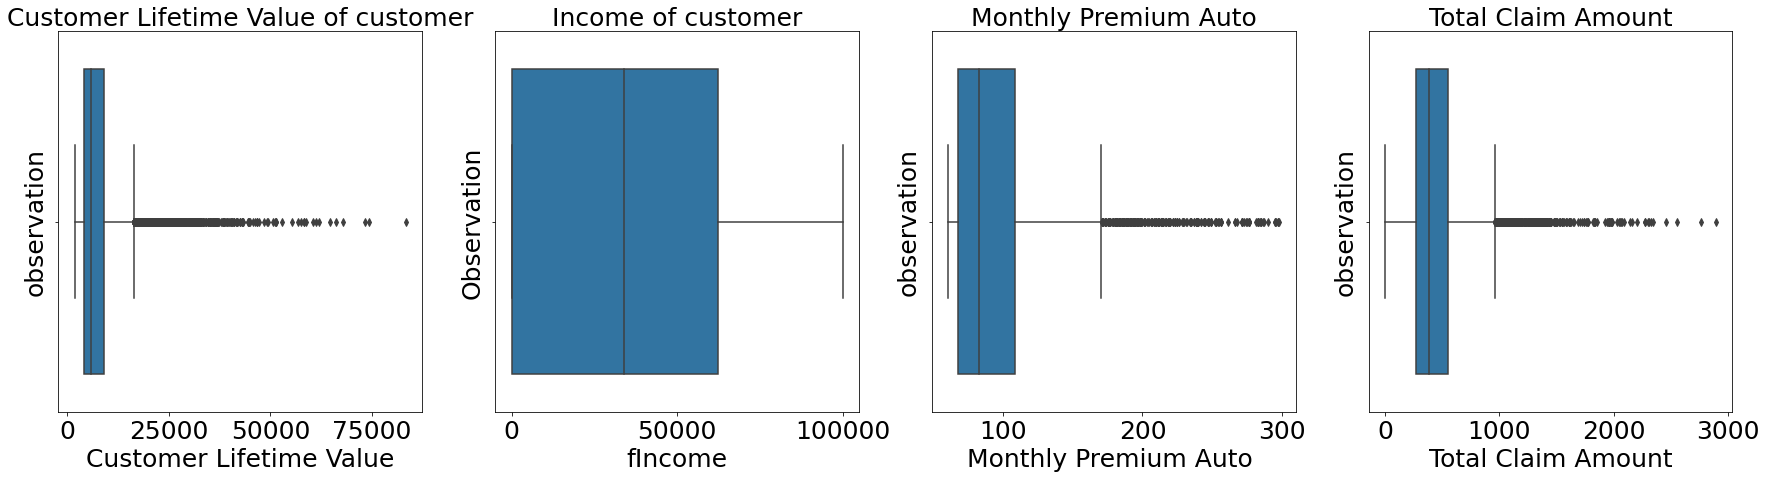

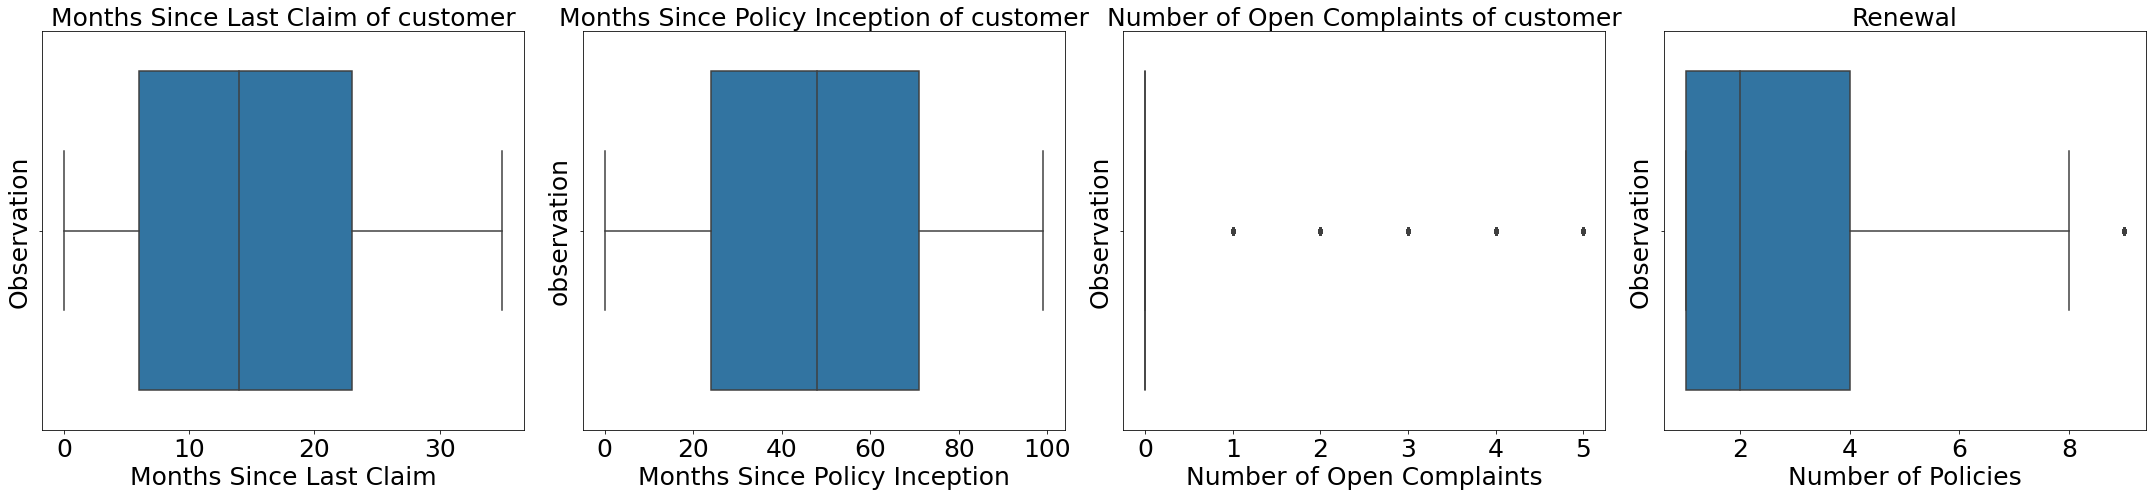

In [13]:
#Independent variables
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 7))
sns.boxplot(df['Customer Lifetime Value'], ax = ax1)     
ax1.set_xlabel('Customer Lifetime Value', fontsize=25)
ax1.set_ylabel('observation', fontsize=25)
ax1.set_title('Customer Lifetime Value of customer', fontsize=25)
ax1.tick_params(labelsize=25)

sns.boxplot(df['Income'], ax = ax2)     
ax2.set_xlabel('fIncome', fontsize=25)
ax2.set_ylabel('Observation', fontsize=25)
ax2.set_title('Income of customer', fontsize=25)
ax2.tick_params(labelsize=25)

sns.boxplot(df['Monthly Premium Auto'], ax = ax3)     
ax3.set_xlabel('Monthly Premium Auto ', fontsize=25)
ax3.set_ylabel('observation', fontsize=25)
ax3.set_title('Monthly Premium Auto', fontsize=25)
ax3.tick_params(labelsize=25)

sns.boxplot(df['Total Claim Amount'], ax = ax4)     
ax4.set_xlabel('Total Claim Amount', fontsize=25)
ax4.set_ylabel('observation', fontsize=25)
ax4.set_title('Total Claim Amount', fontsize=25)
ax4.tick_params(labelsize=25)


fig, (ax5, ax6,ax7, ax8) = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 7))

sns.boxplot(df['Months Since Last Claim'], ax = ax5)    
ax5.set_xlabel('Months Since Last Claim', fontsize=25)
ax5.set_ylabel('Observation', fontsize=25)
ax5.set_title('Months Since Last Claim of customer', fontsize=25)
ax5.tick_params(labelsize=25)

sns.boxplot(df['Months Since Policy Inception'], ax = ax6)      
ax6.set_xlabel('Months Since Policy Inception', fontsize=25)
ax6.set_ylabel('observation', fontsize=25)
ax6.set_title('Months Since Policy Inception of customer', fontsize=25)
ax6.tick_params(labelsize=25)


sns.boxplot(df['Number of Open Complaints'], ax = ax7)     
ax7.set_xlabel('Number of Open Complaints', fontsize=25)
ax7.set_ylabel('Observation', fontsize=25)
ax7.set_title('Number of Open Complaints of customer', fontsize=25)
ax7.tick_params(labelsize=25)

sns.boxplot(df['Number of Policies'], ax = ax8)     
ax8.set_xlabel('Number of Policies', fontsize=25)
ax8.set_ylabel('Observation', fontsize=25)
ax8.set_title('Renewal', fontsize=25)
ax8.tick_params(labelsize=25)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 


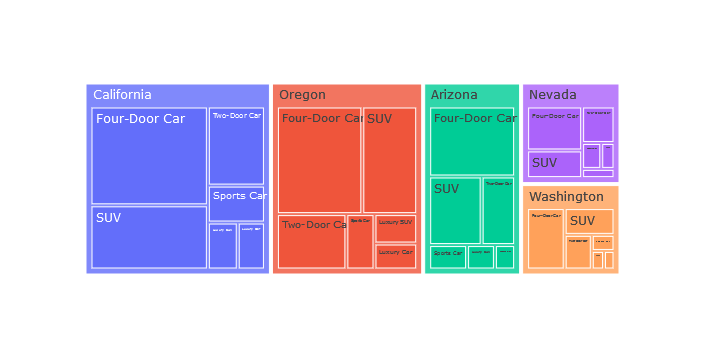

In [14]:
px.treemap(df, values="Total Claim Amount", path=["State", "Vehicle Class"])

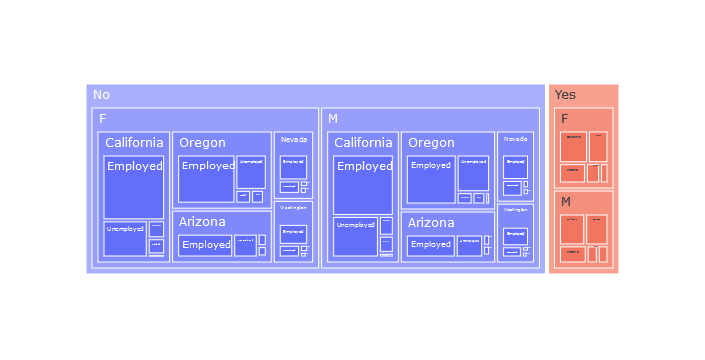

In [15]:
px.treemap(df, values='Renewal', path=["Response","Gender","State", "EmploymentStatus"])

In [16]:
#Import geojson to create a map for Total Claim Amount & Renewal
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

counties["features"][0]

car_claim = df[['State', 'Total Claim Amount']]
car_claim_total = car_claim.groupby('State').sum()


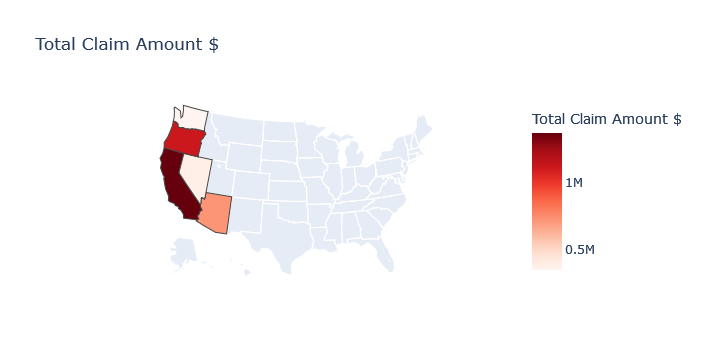

In [17]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Choropleth(
    locations=["AZ", "CA", "NV", "OR", "WA"], # Spatial coordinates
    z = car_claim_total['Total Claim Amount'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Total Claim Amount $",
))

fig.update_layout(
    title_text = 'Total Claim Amount $',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [18]:
car_renewal = df[['State', 'Renewal']]
car_renew_1 = car_renewal.loc[car_renewal['Renewal'] == 1]
car_renewal_total = car_renew_1.groupby("State").count()

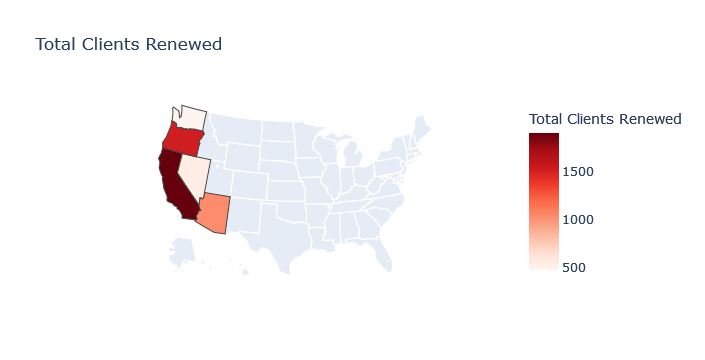

In [19]:
fig = go.Figure(data=go.Choropleth(
    locations=["AZ", "CA", "NV", "OR", "WA"], # Spatial coordinates
    z = car_renewal_total['Renewal'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Total Clients Renewed",
))

fig.update_layout(
    title_text = 'Total Clients Renewed',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

# Data Preperation

In [20]:
#Changing Date to Date format and creating additional variables 
import datetime
df['Effective To Date']= pd.to_datetime(df['Effective To Date'])
df['Date_Month'] = df['Effective To Date'].dt.month
df['Date_Quarter'] = df['Effective To Date'].dt.quarter
df['Day_Of_Week'] = df['Effective To Date'].dt.dayofweek

In [21]:
# label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()

# Encode labels in column 'species'.
df['Response']= label_encoder.fit_transform(df['Response'])
df['Coverage']= label_encoder.fit_transform(df['Coverage'])
df['Education']= label_encoder.fit_transform(df['Education'])
df['EmploymentStatus']= label_encoder.fit_transform(df['EmploymentStatus'])
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Marital Status']= label_encoder.fit_transform(df['Marital Status'])
df['Policy Type']= label_encoder.fit_transform(df['Policy Type'])
df['Policy']= label_encoder.fit_transform(df['Policy'])
df['Location Code']= label_encoder.fit_transform(df['Location Code'])

df['Renew Offer Type']= label_encoder.fit_transform(df['Renew Offer Type'])
df['Sales Channel']= label_encoder.fit_transform(df['Sales Channel'])
df['Vehicle Class']= label_encoder.fit_transform(df['Vehicle Class'])
df['Vehicle Size']= label_encoder.fit_transform(df['Vehicle Size'])
df['State']= label_encoder.fit_transform(df['State'])

In [22]:
df1 = df.drop('Effective To Date', axis = 1)
df1 = df1.drop('Customer', axis = 1)
df1.head()

State  Customer Lifetime Value  Response  Coverage  Education  \
0      4              2763.519279         0         0          0   
1      0              6979.535903         0         1          0   
2      2             12887.431650         0         2          0   
3      1              7645.861827         0         0          0   
4      4              2813.692575         0         0          0   

   EmploymentStatus  Gender  Income  Location Code  Marital Status  ...  \
0                 1       0   56274              1               1  ...   
1                 4       0       0              1               2  ...   
2                 1       0   48767              1               1  ...   
3                 4       1       0              1               1  ...   
4                 1       1   43836              0               2  ...   

   Policy  Renew Offer Type  Sales Channel  Total Claim Amount  Vehicle Class  \
0       2                 0              0          384.811147              5   
1       5                 2              0         1131.464935              0   
2       5                 0              0          566.472247              5   
3       1                 0              2          529.881344              3   
4       3                 0              0          138.130879              0   

   Vehicle Size  Renewal  Date_Month  Date_Quarter  Day_Of_Week  
0             1        1           2             1            3  
1             1        1           1             1            0  
2             1        0           2             1            5  
3             1        1           1             1            3  
4             1        1           2             1            3  

[5 rows x 26 columns]

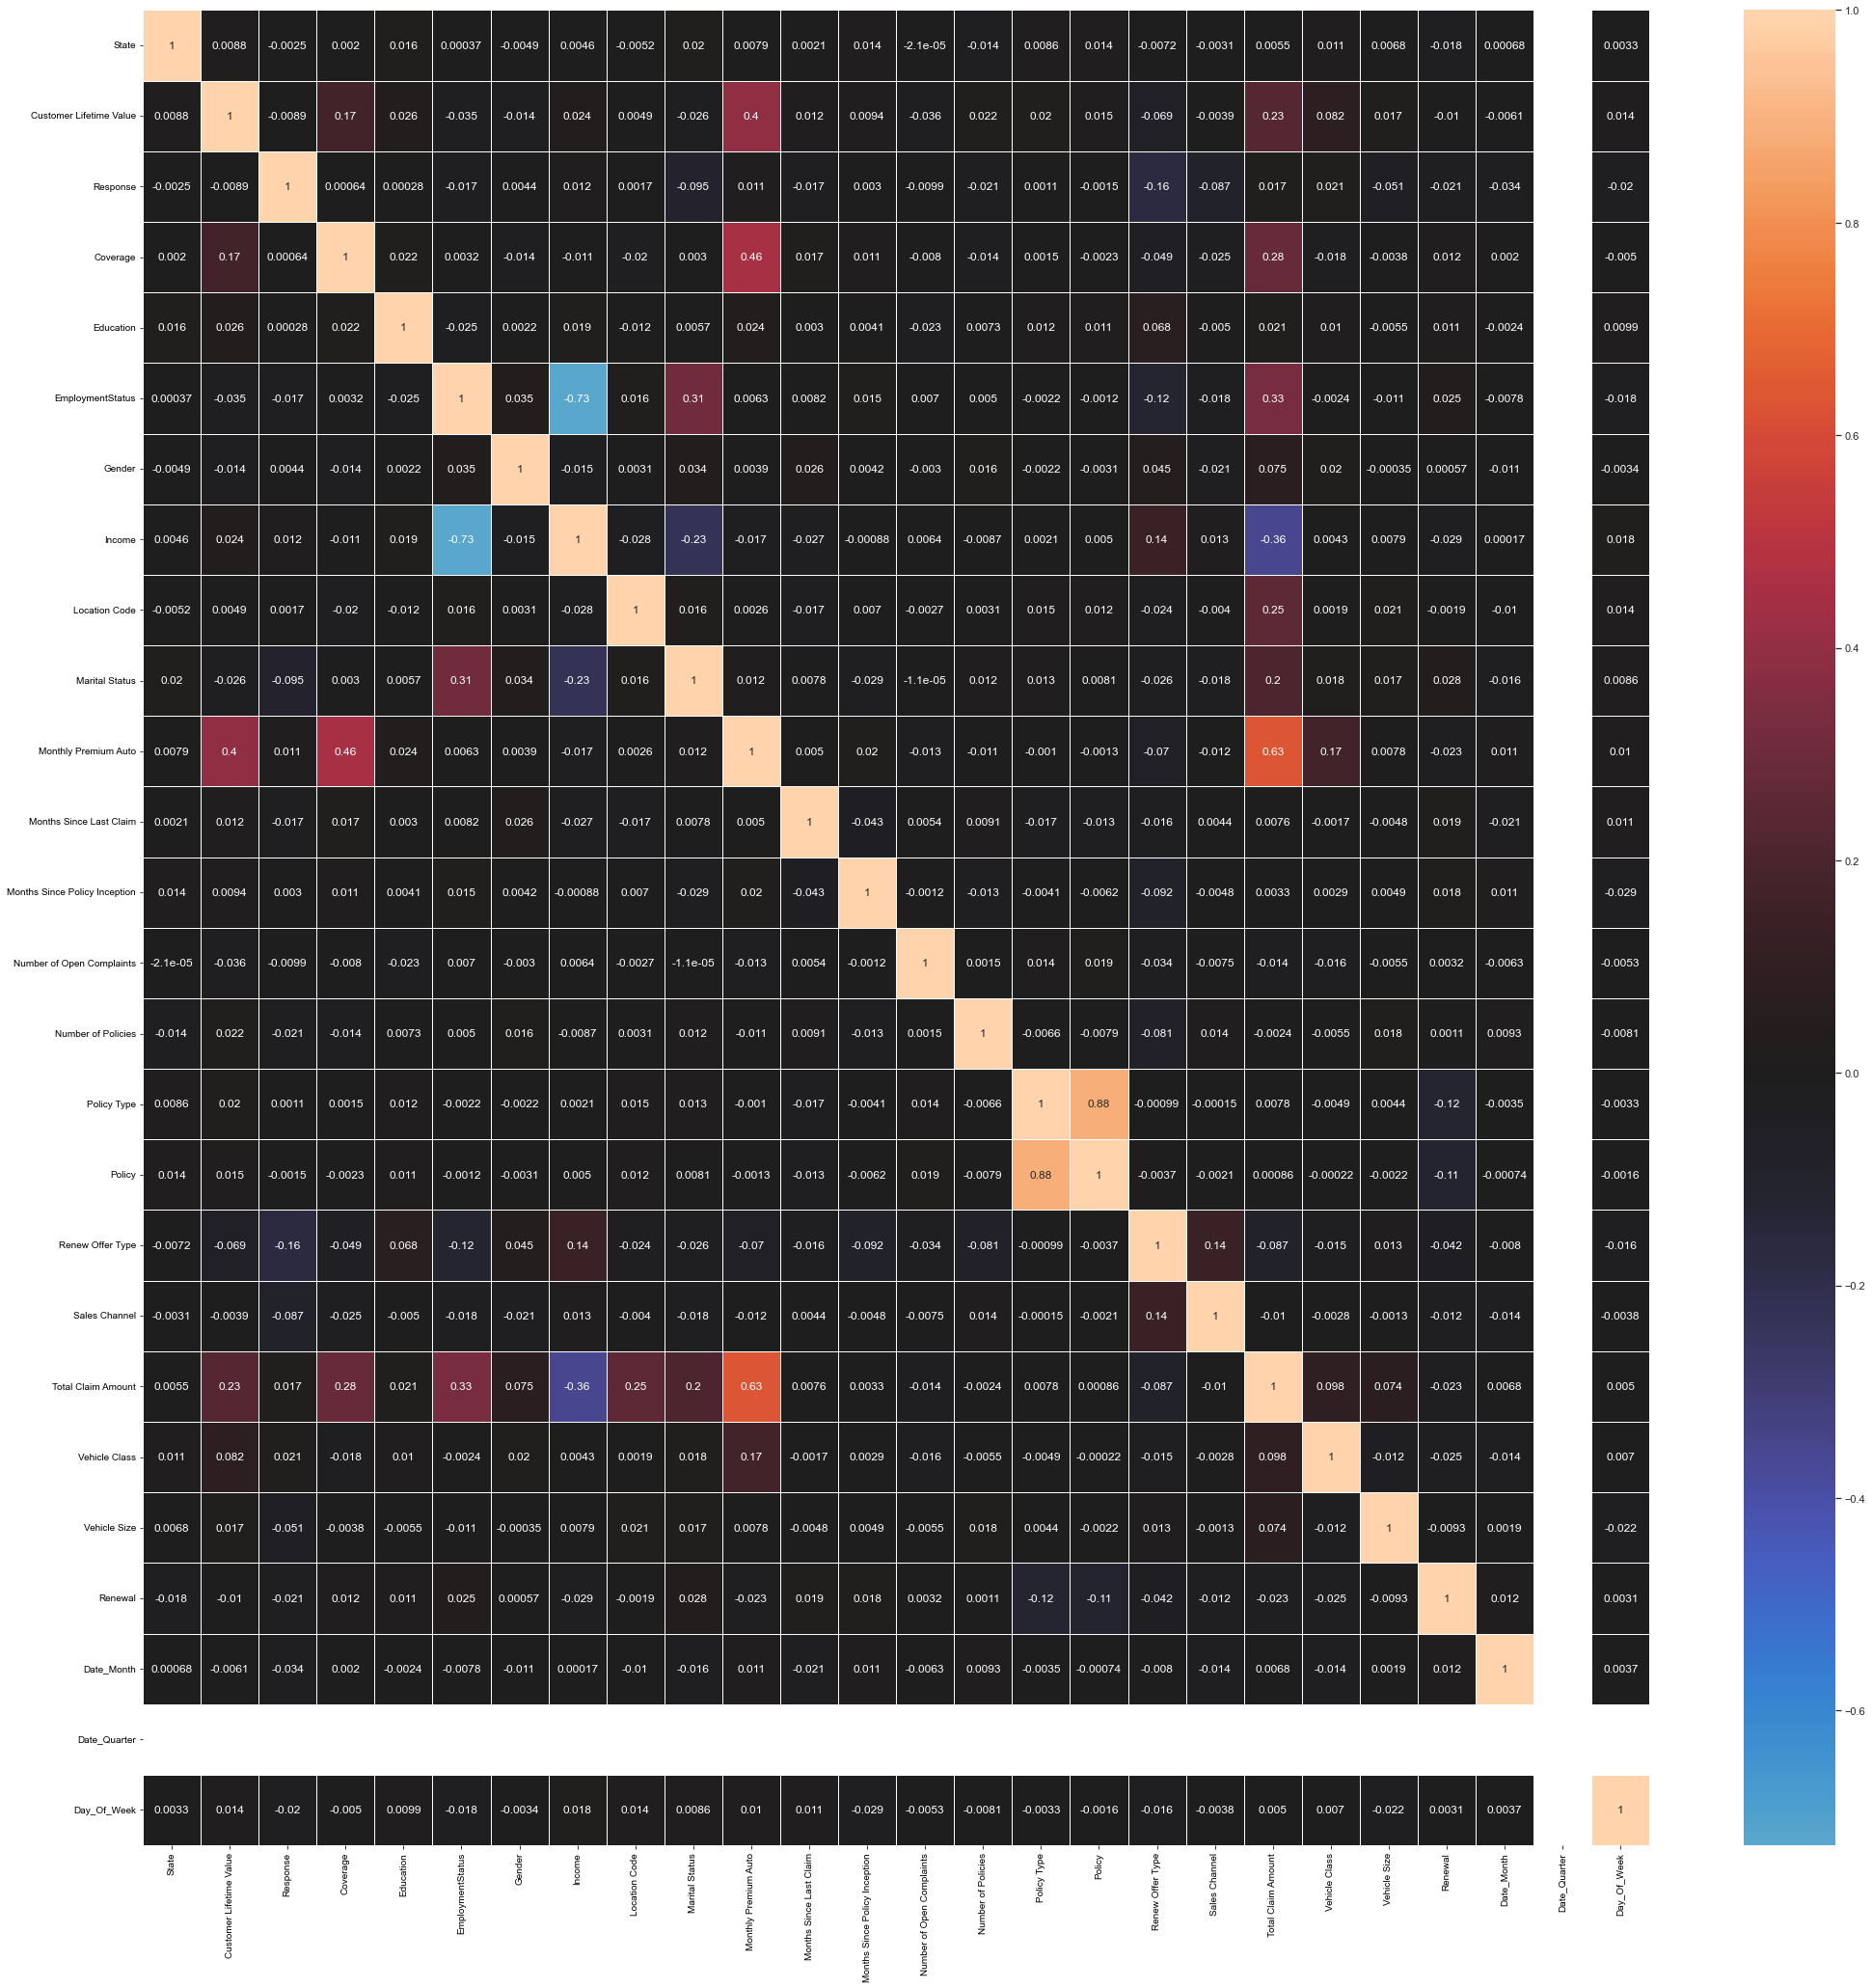

In [23]:
# we have the correlation plot
plt.subplots(figsize=(35,35))
sns.set(font_scale=1.0)
sns.heatmap(df1.corr(), annot=True, center = 0,linewidths=.5)
plt.show()

In [24]:
#Based on the correlation map we will remove the following variables. Using .6 as a threshold
df1 = df.drop(['Policy', 'Income','Monthly Premium Auto','Customer','Effective To Date'], axis = 1)
df1.head()

State  Customer Lifetime Value  Response  Coverage  Education  \
0      4              2763.519279         0         0          0   
1      0              6979.535903         0         1          0   
2      2             12887.431650         0         2          0   
3      1              7645.861827         0         0          0   
4      4              2813.692575         0         0          0   

   EmploymentStatus  Gender  Location Code  Marital Status  \
0                 1       0              1               1   
1                 4       0              1               2   
2                 1       0              1               1   
3                 4       1              1               1   
4                 1       1              0               2   

   Months Since Last Claim  ...  Policy Type  Renew Offer Type  Sales Channel  \
0                       32  ...            0                 0              0   
1                       13  ...            1                 2              0   
2                       18  ...            1                 0              0   
3                       18  ...            0                 0              2   
4                       12  ...            1                 0              0   

   Total Claim Amount  Vehicle Class  Vehicle Size  Renewal  Date_Month  \
0          384.811147              5             1        1           2   
1         1131.464935              0             1        1           1   
2          566.472247              5             1        0           2   
3          529.881344              3             1        1           1   
4          138.130879              0             1        1           2   

   Date_Quarter  Day_Of_Week  
0             1            3  
1             1            0  
2             1            5  
3             1            3  
4             1            3  

[5 rows x 23 columns]

In [25]:
df1['Customer Lifetime Value'] = df1['Customer Lifetime Value'].round().astype(int)
df1['Total Claim Amount'] = df1['Total Claim Amount'].round().astype(int)

In [26]:
#Scaling to create the final dataset for input into the models for each business objectives
scaler = MinMaxScaler()
df_rescaled = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(df_rescaled, columns=['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education','EmploymentStatus', 'Gender', 'Location Code', 
                                               'Marital Status','Months Since Last Claim', 'Months Since Policy Inception','Number of Open Complaints', 'Number of Policies', 
                                               'Policy Type','Renew Offer Type', 'Sales Channel', 'Total Claim Amount','Vehicle Class', 'Vehicle Size', 'Renewal', 'Date_Month',
                                                'Date_Quarter', 'Day_Of_Week'])
scaled_df.head()

State  Customer Lifetime Value  Response  Coverage  Education  \
0   1.00                 0.010635       0.0       0.0        0.0   
1   0.00                 0.062412       0.0       0.5        0.0   
2   0.50                 0.134955       0.0       1.0        0.0   
3   0.25                 0.070591       0.0       0.0        0.0   
4   1.00                 0.011249       0.0       0.0        0.0   

   EmploymentStatus  Gender  Location Code  Marital Status  \
0              0.25     0.0            0.5             0.5   
1              1.00     0.0            0.5             1.0   
2              0.25     0.0            0.5             0.5   
3              1.00     1.0            0.5             0.5   
4              0.25     1.0            0.0             1.0   

   Months Since Last Claim  ...  Policy Type  Renew Offer Type  Sales Channel  \
0                 0.914286  ...          0.0          0.000000       0.000000   
1                 0.371429  ...          0.5          0.666667       0.000000   
2                 0.514286  ...          0.5          0.000000       0.000000   
3                 0.514286  ...          0.0          0.000000       0.666667   
4                 0.342857  ...          0.5          0.000000       0.000000   

   Total Claim Amount  Vehicle Class  Vehicle Size  Renewal  Date_Month  \
0            0.133080            1.0           0.5      1.0         1.0   
1            0.390944            0.0           0.5      1.0         0.0   
2            0.195645            1.0           0.5      0.0         1.0   
3            0.183201            0.6           0.5      1.0         0.0   
4            0.047701            0.0           0.5      1.0         1.0   

   Date_Quarter  Day_Of_Week  
0           0.0     0.500000  
1           0.0     0.000000  
2           0.0     0.833333  
3           0.0     0.500000  
4           0.0     0.500000  

[5 rows x 23 columns]

# Modeling - Business Objective (Predicting: Total Claim Amount)

In [27]:
X = scaled_df.drop('Total Claim Amount', axis = 1).values
y = scaled_df['Total Claim Amount'].values
X.shape, y.shape

((9134, 22), (9134,))

In [28]:
#Creating a Backward Linear Regression to reduce the dataset for the appropriate models
lreg = LinearRegression()

sfs1 = sfs(lreg, k_features=6, forward=False, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(X, y)
sfs1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.5s finished

[2022-03-07 20:08:34] Features: 21/6 -- score: -0.006904605159001274[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s finished

[2022-03-07 20:08:35] Features: 20/6 -- score: -0.006900339796168055[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished

[2022-03-07 20:08:36] Features: 19/6 -- score: -0.006897378346405312[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=6, scoring='neg_mean_squared_error',
                          verbose=2)

In [29]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['1', '3', '5', '7', '8', '16']


In [30]:
final_df = scaled_df.iloc[:, [1,3,5,7,8,16]]
final_df['Total Claim Amount'] = scaled_df['Total Claim Amount']

final_df.head()

Customer Lifetime Value  Coverage  EmploymentStatus  Location Code  \
0                 0.010635       0.0              0.25            0.5   
1                 0.062412       0.5              1.00            0.5   
2                 0.134955       1.0              0.25            0.5   
3                 0.070591       0.0              1.00            0.5   
4                 0.011249       0.0              0.25            0.0   

   Marital Status  Total Claim Amount  
0             0.5            0.133080  
1             1.0            0.390944  
2             0.5            0.195645  
3             0.5            0.183201  
4             1.0            0.047701

In [31]:
X_N = final_df.drop('Total Claim Amount', axis = 1).values
y_N = final_df['Total Claim Amount'].values
X_N.shape, y_N.shape

((9134, 5), (9134,))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_N, y_N, test_size=0.3, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6393, 5) (6393,)
Test set: (2741, 5) (2741,)


In [33]:
#Linear Regression
from sklearn.metrics import roc_auc_score

lr = LinearRegression()
model = lr.fit(X_train,y_train)

y_pred_lr = model.predict(X_test)

print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.298249182122443
R^2 score for test: 0.30114806296002294


In [34]:
print("\nMSE: %.3f\n" % mean_squared_error(y_test, y_pred_lr))
print("RMSE: %.3f\n" % np.sqrt(mean_squared_error(y_test, y_pred_lr)))  
error = (1/y_test.shape[0])*np.sum(np.absolute(y_test- y_pred_lr), axis = 0)
print("MAE: %.3f\n" % error)  
error = (100/y_test.shape[0])*np.sum(np.absolute(y_test - y_pred_lr)/y_test, axis = 0)
print("MAPE: %.3f\n" % error)  
error = (100/y_test.shape[0])*np.sum(np.absolute(y_test - y_pred_lr)/((y_test+y_pred_lr)/2), axis = 0)
print("SMAPE: %.3f\n" % error)  
print("R2: %.3f\n" % r2_score(y_test,y_pred_lr))


MSE: 0.007

RMSE: 0.083

MAE: 0.059

MAPE: inf

SMAPE: 44.573

R2: 0.301



In [35]:
#Lasso
from sklearn.linear_model import Ridge, Lasso

Lasso = Lasso(alpha= 0.01, fit_intercept= True, normalize=True, positive= False, selection= 'random',tol=0.005)
Lasso.fit(X_train, y_train)
y_predlasso = model.predict(X_test)

print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(X_test, y_test))
print(r2_score(y_test,y_predlasso))

0.150371866394441
[0. 0. 0. 0. 0.]
-0.00011977384106520717
0.30114806296002294


In [36]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predlasso)))
print('R-squared:',r2_score(y_test,y_predlasso)) 

RMSE: 0.08256056209465105
R-squared: 0.30114806296002294


In [37]:
#Ridge
ridge=Ridge(alpha=0.1,normalize=True)
ridge.fit(X_train,y_train)
print('Ridge Regression')
y_pred_rd = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rd)))
print('R-squared:',r2_score(y_test,y_pred_rd)) 

Ridge Regression
RMSE: 0.08261280903102124
R-squared: 0.3002632718440059


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)
y_pred_dt =dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_dt)))
print("MAE",mean_absolute_error(y_test,y_pred_dt))
print('R-squared:',r2_score(y_test,y_pred_dt)) 

RMSE: 0.08259922769466864
MAE 0.04288813479125916
R-squared: 0.30049332282062025


# Modeling - Business Objectives (Predicting: Renewal)

In [39]:
X_R = df1.drop('Renewal', axis = 1).values
y_R = df1['Renewal'].values
X_R.shape, y_R.shape

((9134, 22), (9134,))

In [40]:
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split( X_R, y_R, test_size=0.2, random_state=4)
print ('Train set:', X_train_R.shape,  y_train_R.shape)
print ('Test set:', X_test_R.shape,  y_test_R.shape)

Train set: (7307, 22) (7307,)
Test set: (1827, 22) (1827,)


In [41]:
#Logistic Regression
model = LogisticRegression(C=0.1,max_iter = 100)
model.fit(X_train_R,y_train_R)

y_pred_LR = model.predict(X_test_R)

print(f'Test accuracy: {model.score(X_test_R,y_test_R)}')
print(f'Train accuracy: {model.score(X_train_R,y_train_R)}')



Test accuracy: 0.6174055829228243
Train accuracy: 0.5981935130696592


In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test_R, y_pred_LR))

              precision    recall  f1-score   support

           0       0.57      0.01      0.01       700
           1       0.62      1.00      0.76      1127

    accuracy                           0.62      1827
   macro avg       0.59      0.50      0.39      1827
weighted avg       0.60      0.62      0.47      1827



In [48]:
#XBG Classifer
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_R, y_train_R)
preds_XGB = model.predict(X_test_R)
print('RMSE:',np.sqrt(mean_squared_error(y_test_R,preds_XGB)))
print("MAE",mean_absolute_error(y_test_R,preds_XGB))
print('R-squared:',r2_score(y_test_R,preds_XGB)) 
print(f'Test accuracy: {model.score(X_test_R,y_test_R)}')
print(f'Train accuracy: {model.score(X_train_R,y_train_R)}')

[20:10:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
RMSE: 0.5687540035767351
MAE 0.32348111658456485
R-squared: -0.3686867790594499
Test accuracy: 0.6765188834154351
Train accuracy: 0.9570275078691666


In [49]:
print(classification_report(y_test_R, preds_XGB))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57       700
           1       0.73      0.75      0.74      1127

    accuracy                           0.68      1827
   macro avg       0.66      0.65      0.66      1827
weighted avg       0.67      0.68      0.68      1827



In [50]:
#Decision Tree Classifier
dtree = DecisionTreeClassifier(criterion='gini',random_state=42) #criterion = entopy, gini
dtree.fit(X_train_R, y_train_R)
dtreepred = dtree.predict(X_test_R)

print("Training set score:{:.3f}".format(dtree.score(X_train_R,y_train_R)))
print("Test set score:{:.3f}".format(dtree.score(X_test_R,y_test_R)))

Training set score:0.987
Test set score:0.666


In [51]:
print(classification_report(y_test_R, dtreepred))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57       700
           1       0.73      0.73      0.73      1127

    accuracy                           0.67      1827
   macro avg       0.65      0.65      0.65      1827
weighted avg       0.67      0.67      0.67      1827



In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

LR_auc = roc_auc_score(y_test_R, y_pred_LR)
DT_auc = roc_auc_score(y_test_R, dtreepred)
XGB_auc = roc_auc_score(y_test_R, preds_XGB)
print('Logistic: ROC AUC=%.3f' % (LR_auc))
print('Decision Tree: ROC AUC=%.3f' % (DT_auc))
print('XBG: ROC AUC=%.3f' % (XGB_auc))

Logistic: ROC AUC=0.502
Decision Tree: ROC AUC=0.647
XBG: ROC AUC=0.654


In [55]:
#!pip install xgboost